**Exploratory Data Analysis (EDA)**

**Univariate Analysis**

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

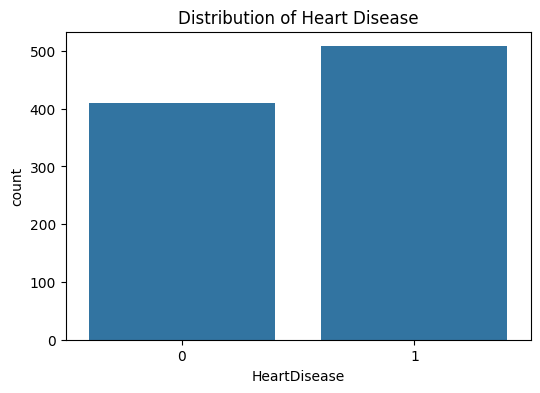

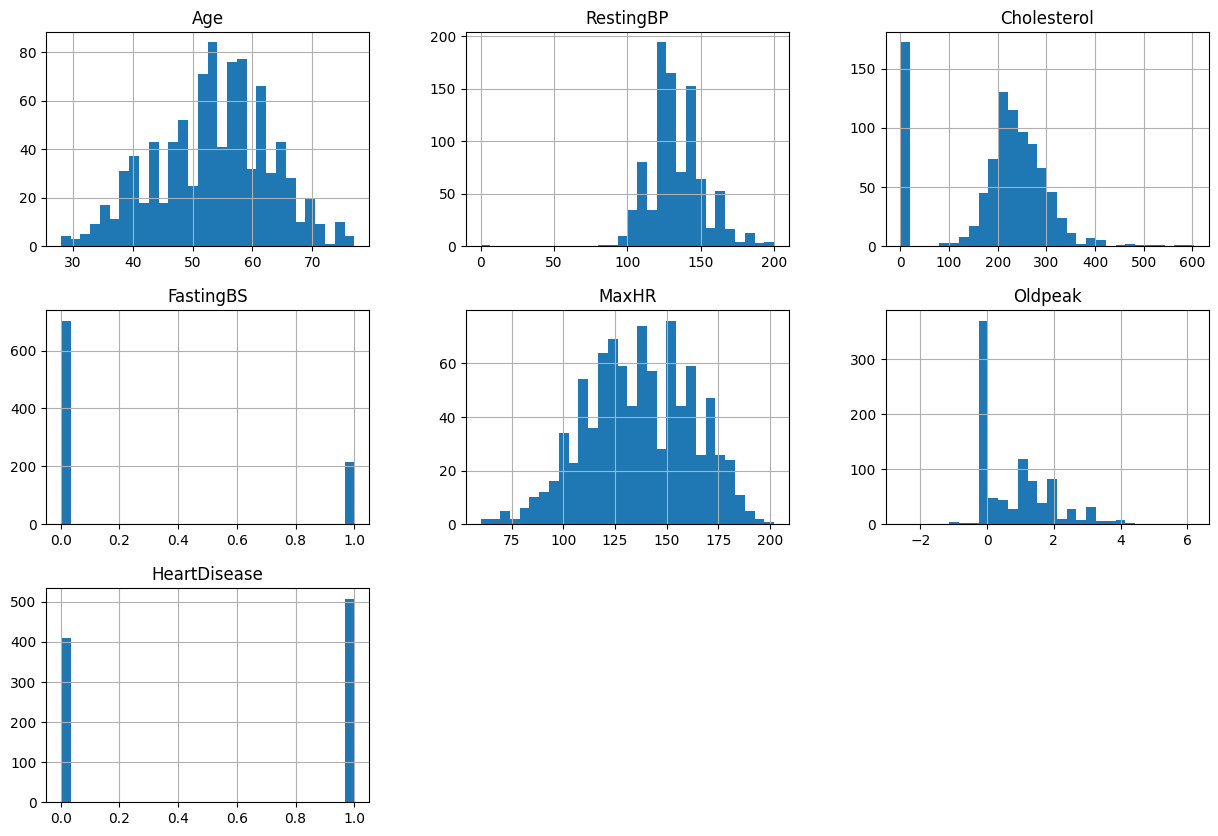

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset (replace with your file path)
data = pd.read_csv('/content/heart disease prediction.csv')

# Display basic information about the dataset
print(data.head())
print(data.info())
print(data.describe())

# Univariate Analysis
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=data)
plt.title('Distribution of Heart Disease')
plt.show()

# Distribution of numerical features
data.hist(bins=30, figsize=(15, 10))
plt.show()


**Bivariate Analysis**

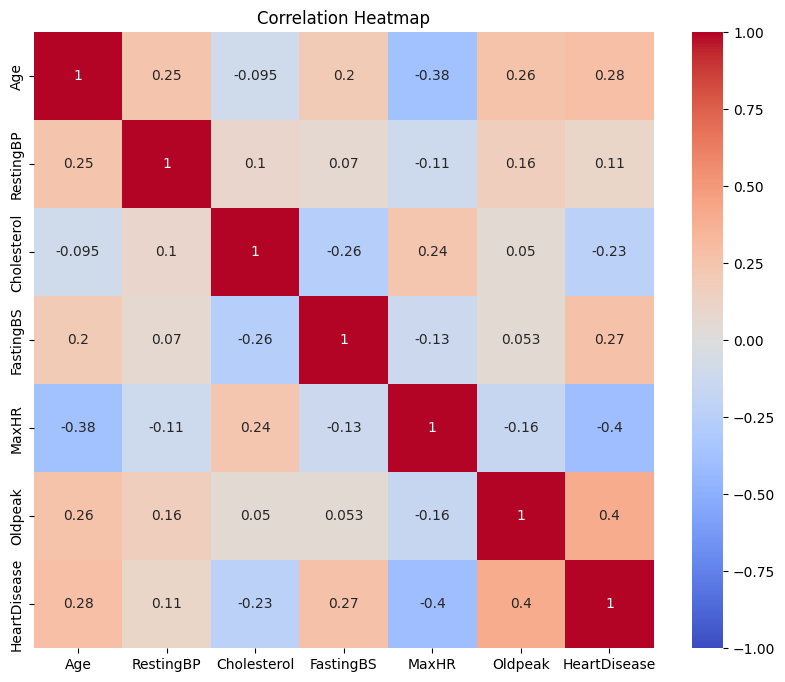

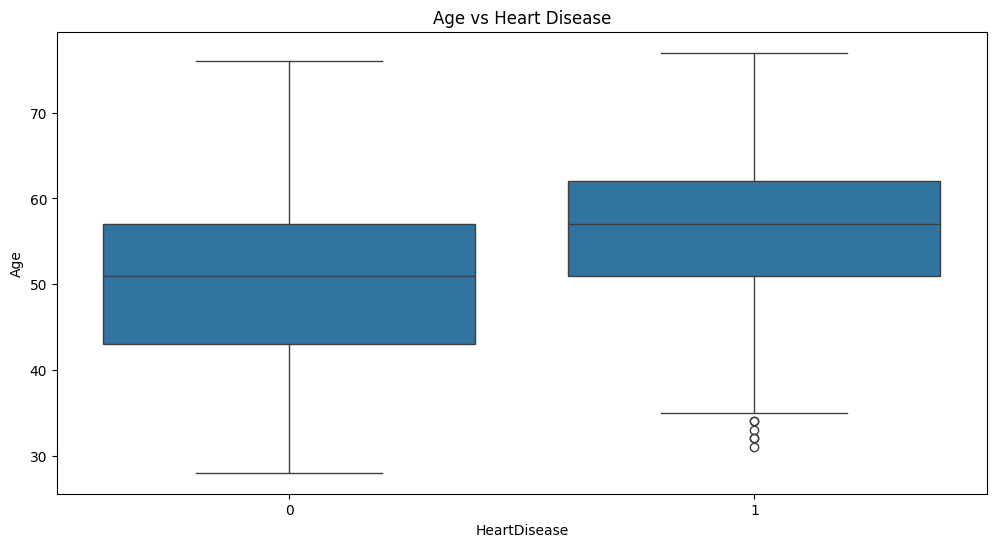

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1) # Select only numerical columns for correlation calculation
plt.title('Correlation Heatmap')
plt.show()

# Boxplot for numerical features by target
plt.figure(figsize=(12, 6))
sns.boxplot(x='HeartDisease', y='Age', data=data)
plt.title('Age vs Heart Disease')
plt.show()

**Multivariate Analysis**

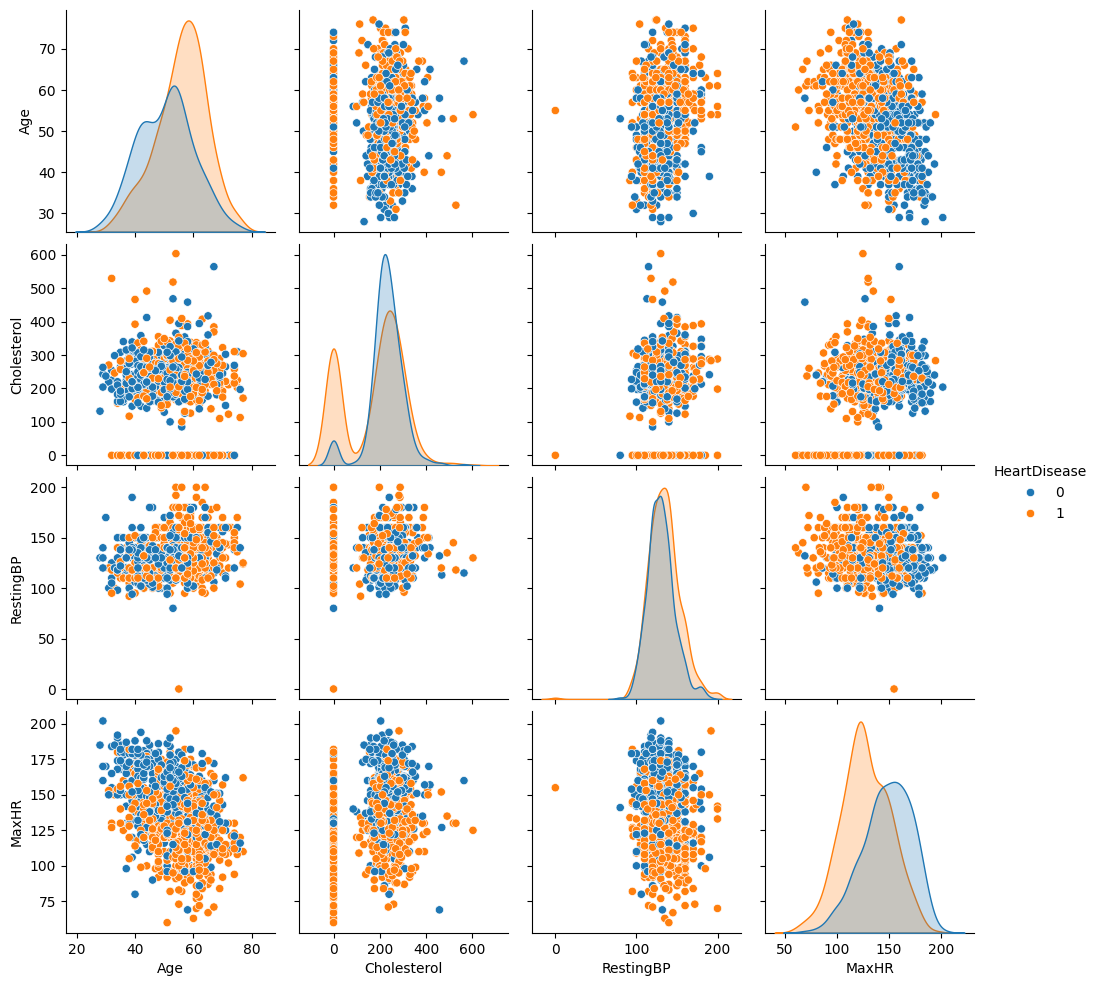

In [13]:
# Pairplot for selected features
sns.pairplot(data, hue='HeartDisease', vars=['Age', 'Cholesterol', 'RestingBP', 'MaxHR'])
plt.show()


**Data Preprocessing**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Preprocessing
# Handle missing values and encode categorical variables
features = data.drop(columns=['HeartDisease'])
target = data['HeartDisease']

# Identify categorical and numerical columns
categorical_features = features.select_dtypes(include=['object']).columns
numerical_features = features.select_dtypes(exclude=['object']).columns

# Define preprocessing for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Train model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Train Accuracy: 1.0
Test Accuracy: 0.8804347826086957
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



**Hyperparameter Tuning**

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter grid
param_dist = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=3,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

# Predict and evaluate best model
y_pred_best = best_model.predict(X_test)
print("Best Model Train Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
print("Best Model Test Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 108}
Best Model Train Accuracy: 0.9291553133514986
Best Model Test Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

